<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_Colocacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTODO DE COLOCACIÓN

Consideramos el problema


  $\frac{\partial ^2 u}{\partial x^2} + u = -x$

  $u(0) = 0$
  
  $ \mu (1)=0$

  Ecuacion ordinaria no homogenea

Error

$E=F(U_N)-f(x)$

El método de colocación consiste en aproximar la solución con funciones simples y hacer que la ecuación diferencial se cumpla solo en algunos puntos elegidos del intervalo (puntos de colocación).
Así obtenemos un sistema algebraico para aproximar la solución y que también cumple las condiciones de frontera.

Sirve para resolver ecuaciones diferenciales cuando no existe solución exacta o es difícil obtenerla.

Es una técnica típica de métodos numéricos tipo elemento finito o espectral

El metodo es heuristico

**Ejercicio 5.1**


$u''(x) + u(x) = x,
\qquad u(0) = 0,
\qquad u'(0) = 2.$

Importamos las librerias necesarias


*   Sympy se usa resolver(derivadas, resolver sistemas...)
*   Numpy para arreglos numericos, vectores...
*   Matplotlib para graficar





In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Definimos la variable y la funcion


$x$ la variable simbolica


$u$ declara que hay una funcion $u(x)$ para usar en dsolve con sympy

In [2]:
x = sp.symbols('x')
u = sp.Function('u')

Definicion de la ecuacion y solucion exacta con las
condiciones


*   ode construye la ecuacion $u''(x)+u(x)=x$
*   sp.dsolve la resuelve con las condiciones
*   sp.lambdify(x, u_expr, "numpy") convierte la expresión simbólica en una función numérica vectorizada que puede evaluarse en arrays de numpy





In [3]:
ode = u(x).diff(x,x) + u(x) - x
sol = sp.dsolve(ode, ics={u(0):0, sp.diff(u(x),x).subs(x,0):2})
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")


Grafica de la solución exacta

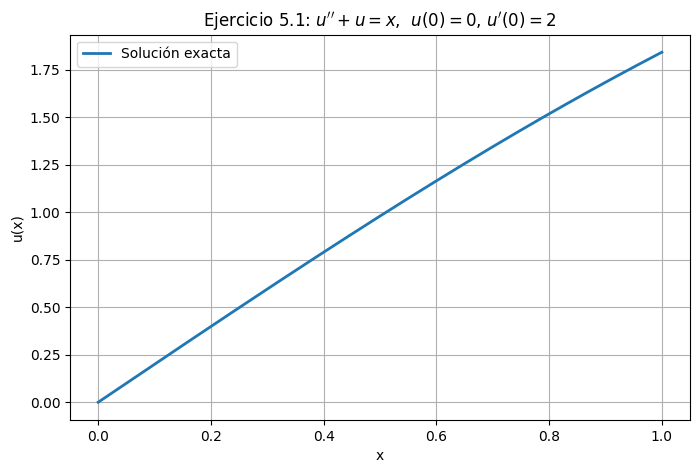

In [5]:
xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución exacta", linewidth=2)
plt.title("Ejercicio 5.1: $u''+u=x$,  $u(0)=0$, $u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

La gráfica muestra la solución exacta de la ecuación diferencial $u'' + u = x$ con condiciones $u(0)= 0 $ y $u'(0) =2$ Se observa cómo la función inicia en cero, crece de forma suave y cumple exactamente el comportamiento impuesto por la ecuación y las condiciones iniciales en el intervalo [0,1].

Puntos para la colocacion

In [6]:
a2, a3 = sp.symbols('a2 a3')

u_n = 0 + 2*x + a2*x**2 + a3*x**3

Se calcula la segunda derivada simbólica u_n_2

F es el residuo $ϵ(x) = u''_N (x) + u_N(x) -x $


In [7]:
u_n_2 = sp.diff(u_n, x, 2)
F = u_n_2 + u_n - x

Puntos de colocacion y sistema de ecuaciones

In [9]:
points = [sp.Rational(1,2), sp.Rational(1,1)]
eqs = [sp.Eq(F.subs(x,p), 0) for p in points]

Resolver el sistema y mostrarlo

In [10]:
for eq in eqs:
    sp.pprint(eq)

sol_1 = sp.solve(eqs, [a2, a3])
print("\nSolución de coeficientes:", sol_1)


9⋅a₂   25⋅a₃   1    
──── + ───── + ─ = 0
 4       8     2    
3⋅a₂ + 7⋅a₃ + 1 = 0

Solución de coeficientes: {a2: -1/17, a3: -2/17}


In [11]:
u_aprprox = u_n.subs(sol_1)
u_aprprox_fn = sp.lambdify(x, u_aprprox, "numpy")
sp.pprint(u_aprprox)


     3    2      
  2⋅x    x       
- ──── - ── + 2⋅x
   17    17      


Graficar la solucion

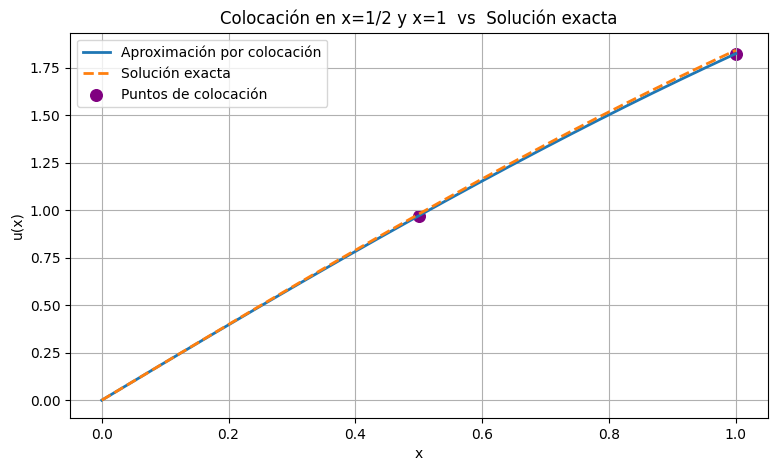

In [12]:
plt.figure(figsize=(9,5))
plt.plot(xx, u_aprprox_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

#Puntos de colocación
plt.scatter([0.5, 1], u_aprprox_fn(np.array([0.5, 1])),
            color="purple", s=70, label="Puntos de colocación")

plt.title("Colocación en x=1/2 y x=1  vs  Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()


La gráfica compara la solución exacta con la aproximación obtenida por el método de colocación. La curva aproximada sigue muy de cerca a la curva exacta, mostrando que el método funciona bien. En los puntos de colocación $x = \frac{1}{2}$ y $x =1$, ambas coinciden exactamente, porque ahí se impuso que la ecuación diferencial se cumpla. Las diferencias entre las curvas son pequeñas y se dan fuera de esos puntos.

Calculo del error

In [13]:
abs_error = np.abs(yy - u_aprprox_fn(xx))
max_error = np.max(abs_error)
l2_error = np.sqrt(np.trapz(abs_error**2, xx))
print("\nError máximo:", max_error)
print("Error L2:", l2_error)


Error máximo: 0.01794157304319066
Error L2: 0.010555763282674591


/tmp/ipython-input-228000408.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  l2_error = np.sqrt(np.trapz(abs_error**2, xx))


Grafica del error

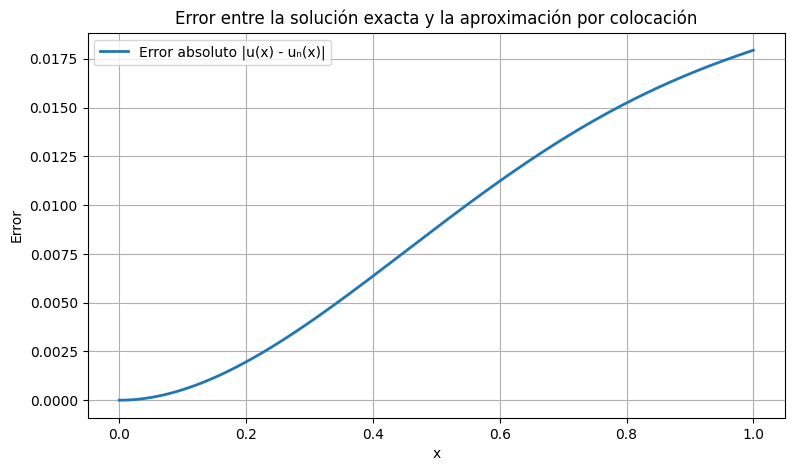

In [14]:
error = np.abs(yy - u_aprprox_fn(xx))

plt.figure(figsize=(9,5))
plt.plot(xx, error, label="Error absoluto |u(x) - uₙ(x)|", linewidth=2)
plt.title("Error entre la solución exacta y la aproximación por colocación")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

**Conclusion**: La aproximación obtenida por el método de colocación se ajusta muy bien a la solución exacta
$u(x)=sinx+x$ Las curvas coinciden en los puntos de colocación y el error en todo el intervalo [0,1] es pequeño.